# 1.EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

 Path to raw or split dataset

In [2]:
data_path = r"C:\Users\Varun\OneDrive\Pictures\Desktop\waste_classification_project\application\data\raw"

#### 1. List the categories of waste

In [3]:
categories = os.listdir(data_path)
print("Categories:", categories)

Categories: ['cardboard waste', 'clothe waste', 'Electronic waste', 'glass waste', 'metal waste', 'organic waste', 'paper waste', 'plastic waste', 'shoes waste', 'trash']


#### 2. Count images per each category

In [4]:
image_counts = {}
for cat in categories:
    cat_path = os.path.join(data_path, cat)
    if os.path.isdir(cat_path):
        image_counts[cat] = len(os.listdir(cat_path))

print("Image counts:", image_counts)

Image counts: {'cardboard waste': 2534, 'clothe waste': 2500, 'Electronic waste': 2116, 'glass waste': 2748, 'metal waste': 2039, 'organic waste': 2232, 'paper waste': 2772, 'plastic waste': 2917, 'shoes waste': 1977, 'trash': 1883}


#### 3. Plot distribution of Category

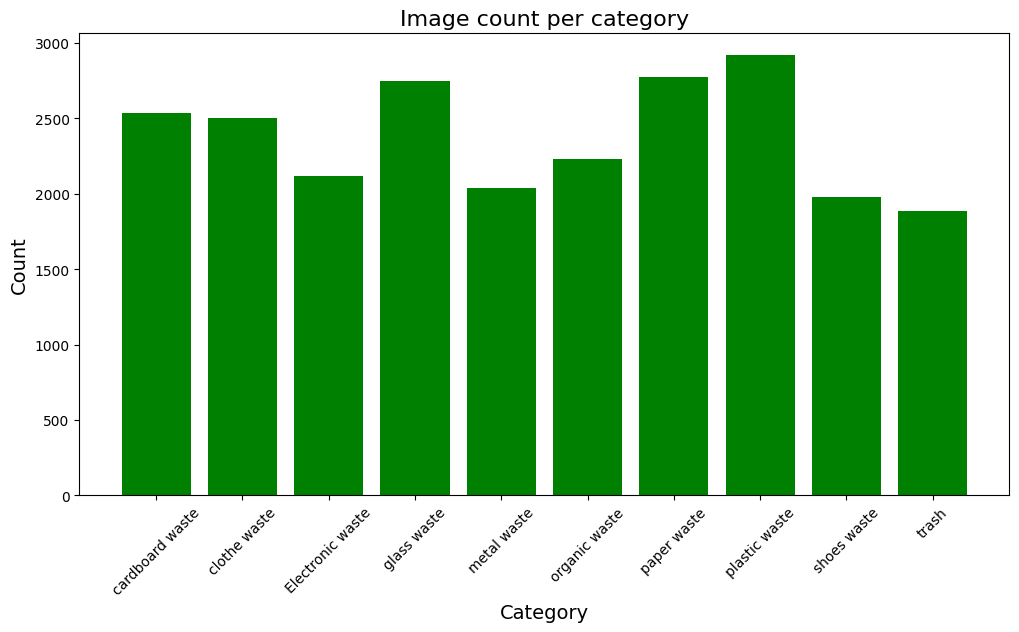

In [5]:
plt.figure(figsize=(12, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='green')
plt.title('Image count per category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45) 
plt.show()


Plot category distribution as a pie chart

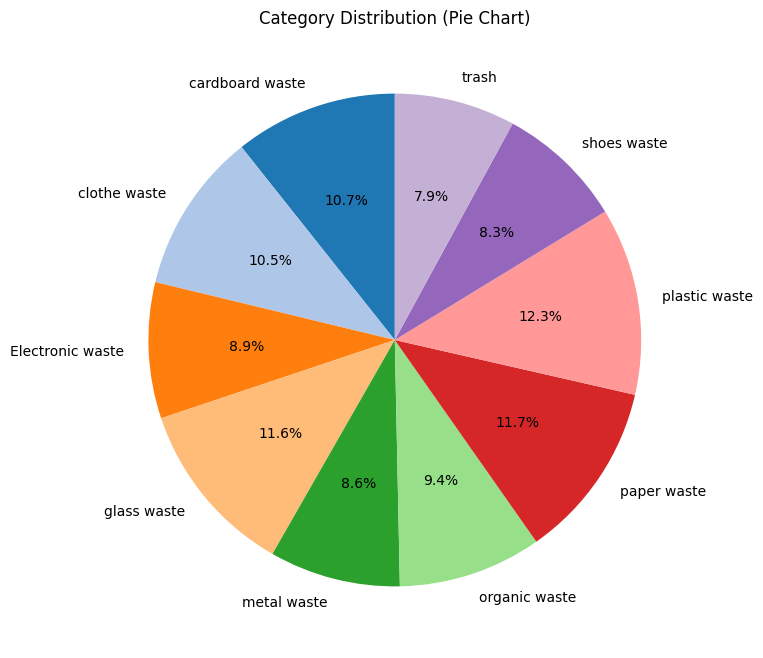

In [6]:
plt.figure(figsize=(8, 8))
plt.pie(image_counts.values(), labels=image_counts.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("Category Distribution (Pie Chart)")
plt.show()


#### 4. Display random sample images from each category

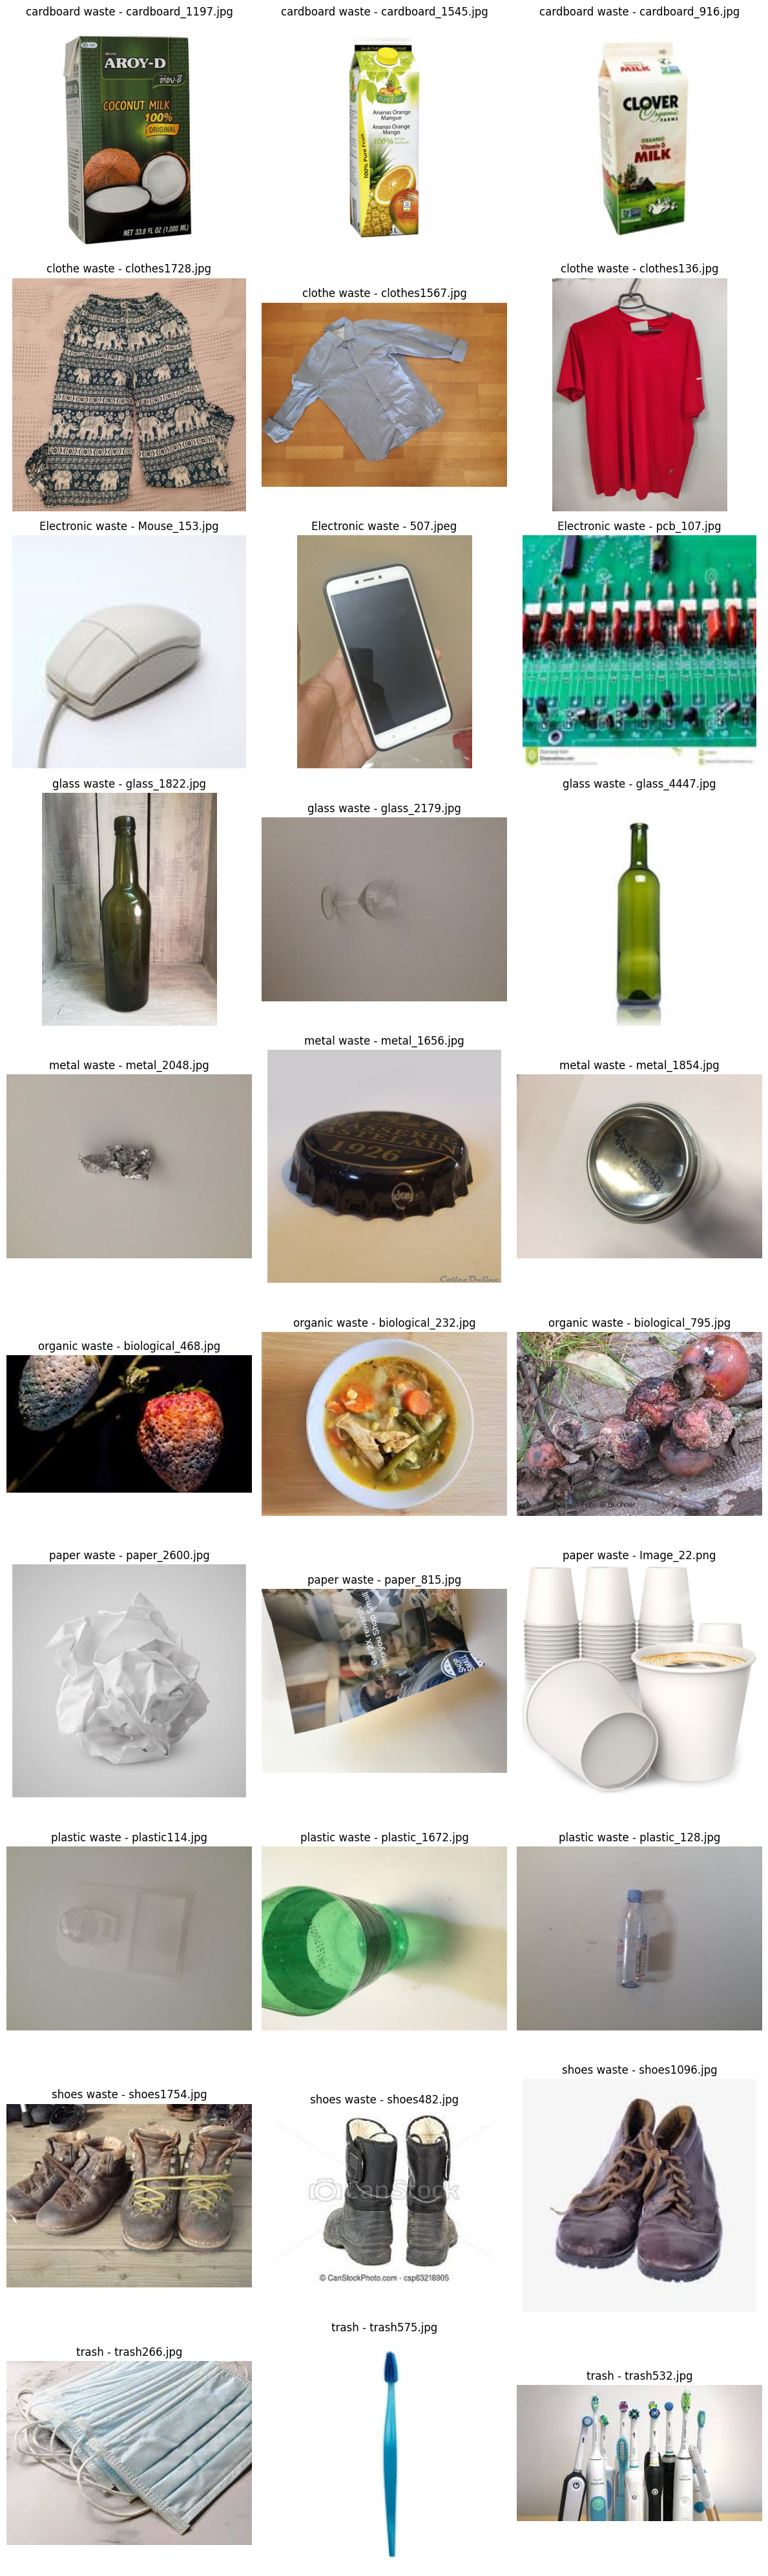

In [7]:
import random

fig, axes = plt.subplots(len(categories), 3, figsize=(12, 4 * len(categories)))

for i, cat in enumerate(categories):
    cat_path = os.path.join(data_path, cat)
    sample_imgs = random.sample(os.listdir(cat_path), min(3, len(os.listdir(cat_path))))  # 3 sample images per category
    
    for j, img_name in enumerate(sample_imgs):
        img_path = os.path.join(cat_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i, j].imshow(img)
        axes[i, j].set_title(f"{cat} - {img_name}")
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()


#### 5. Check for corrupt images

In [8]:
bad_files = []
for cat in categories:
    cat_path = os.path.join(data_path, cat)
    for img_name in os.listdir(cat_path):
        img_path = os.path.join(cat_path, img_name)
        img = cv2.imread(img_path)
        if img is None:  # unable to read image
            bad_files.append(img_path)

print("Corrupt/Missing files:", bad_files if bad_files else "None found ✅")


Corrupt/Missing files: None found ✅
